# CÂU HỎI 5: THỐNG KÊ TÌM ĐIỂM BẤT THƯỜNG

**Ý NGHĨA TRẢ LỜI CÂU HỎI:**
- Nhờ vào một số phép thống kê, một số giáo viên đã phát hiện ra gian lận thi cử ở năm 2018. Ta sẽ thử xem dữ liệu điểm thi vào các năm sau có gì khác thường không. 
- Ta sẽ thống kê 3 cột bao gồm tổng số lượng thí sinh thi ở tỉnh đó, điểm trung bình TN THPT tỉnh đó và số lượng điểm trên 9 của tỉnh đó.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Đọc dữ liệu từ file `..\data\score_college_exam_data.csv` và lưu vào biến `df`

In [2]:
df = pd.read_csv('..\data\score_college_exam_data.csv', index_col= "Unnamed: 0")
df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


Ta lấy dữ liệu điểm năm 2019

In [3]:
df_2019 = df[df['Year'] == 2019]
df_2019.shape

(811851, 11)

Coi những thí sinh tự do là những thí sinh thi ít hơn 6 môn, ta sẽ loại đi những thí sinh này ( để sau này tính điểm tốt nghiệp trung bình)

In [4]:
df_2019 = df_2019.dropna(thresh=8)
df_2019.shape

(726614, 11)

Sau đó ta sẽ lấy mã tỉnh ra: là 2 kí tự đầu trong SBD của thí sinh, nhưng vì có những tỉnh có mã số < 10 bị mất số 0 ở đầu nên với các tỉnh đó, ta cần trả về thêm số 0.

Trước tiên, phải chuyển SBD sang dạng str cho tiện xử lý.

In [5]:
df_2019['sbd'] = df_2019['sbd'].astype(str)

In [6]:
def returnSBD(i):
    if len(i) == 8:
        return i[:2]
    return '0{}'.format(i[0])

Ta sẽ thêm cột tỉnh chứa mã số của tỉnh đó

In [7]:
df_2019['Tinh'] = df_2019['sbd'].apply(returnSBD)

Ta khởi tạo dataframe df_check_valid để lưu các cột mà ta cần. Ở đây ta sẽ xét 3 tiêu chí: Số lượng thí sinh tham dự thi, điểm trung bình và số lượng điểm trên 9 của một tỉnh

In [8]:
df_check_valid = pd.DataFrame([],index = sorted(df_2019['Tinh'].unique()))

Ta tính xem mỗi tỉnh có bao nhiêu thí sinh tham gia thi

In [9]:
df_check_valid['Num'] = df_2019['Tinh'].value_counts().sort_index()

Ta lấy các cột điểm thi để tính điểm tốt nghiệp trung bình

In [10]:
df_score = df_2019[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD','Tinh']]

Tính trung bình điểm tốt nghiệp của 1 thí sinh, sau đó lưu vào cột Mean của df_score

In [11]:
df_score['Mean'] = np.nanmean(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']],axis = 1)

Ta gom nhóm theo mã tỉnh, sau đó tính điểm thi trung bình của tỉnh đó và lưu vào cột Mean của df_check_valid

In [12]:
df_mean = df_score[['Tinh','Mean']]
df_mean = df_mean.groupby(['Tinh']).mean()
df_check_valid['Mean'] = df_mean['Mean']

Tiếp theo, ta tính số lượng điểm trên 9 của từng thí sinh, lưu vào cột 'NumOf9'

In [13]:

count_high = np.nansum(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']]>=9,axis = 1)
df_score['NumOf9'] = count_high
df_count_high = df_score[['Tinh','NumOf9']]


Tiếp tục gom nhóm theo tỉnh và tính tổng điểm trên 9 của tỉnh đó, lưu vào cột NumOf9 của df_check_valid

In [14]:
df_count_high = df_score[['Tinh','NumOf9']]
df_count_high = df_count_high.groupby(['Tinh']).sum()
df_check_valid['NumOf9'] = df_count_high['NumOf9']

Ta sẽ coi top 15 tỉnh có thí sinh đông nhất

In [15]:
top15num = df_check_valid['Num'].sort_values(ascending=False).reset_index().head(15)
top15num

,index,Num
0,01,64913
1,28,32154
2,29,30086
3,48,23020
4,40,18753
5,37,17161
6,26,16773
7,03,16663
8,18,16654
9,25,16325


Top 15 tỉnh có số điểm trung bình cao nhất nhiều nhất

In [16]:
top15mean = df_check_valid['Mean'].sort_values(ascending=False).reset_index().head(15)

Top 15 tỉnh có số lượng điểm trên 9 cao nhất

In [17]:
top15score9 = df_check_valid['NumOf9'].sort_values(ascending=False).reset_index().head(15)

Lấy ra mã tỉnh có điểm bất thường. Tỉnh có điểm bất thường là tỉnh mà nằm trong top 15 điểm trên 9 nhưng không nằm trong top 15 số lượng thí sinh thi hay top 15 điểm trung bình cao nhất

In [18]:
for i in top15score9['index']:
    if i not in top15mean['index'].values and i not in top15num['index'].values:
        print(i)

19


In [19]:
def find_abnormal(year):
    df_year = df[df['Year'] == year]
    df_year['sbd'] = df_year['sbd'].astype(str)
    df_year['Tinh'] = df_year['sbd'].apply(returnSBD)

    df_check_valid = pd.DataFrame([],index = sorted(df_year['Tinh'].unique()))
    df_check_valid['Num'] = df_year['Tinh'].value_counts().sort_index()
    df_score = df_year[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD','Tinh']]
    
    df_score['Mean'] = np.nanmean(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']],axis = 1)
    
    df_mean = df_score[['Tinh','Mean']]
    df_mean = df_mean.groupby(['Tinh']).mean()
    df_check_valid['Mean'] = df_mean['Mean']

    count_high = np.nansum(df_score[['Toan','Van','Ngoai_ngu','Li','Hoa','Sinh','Su','Dia','GDCD']]>=9,axis = 1)
    df_score['NumOf9'] = count_high
    df_count_high = df_score[['Tinh','NumOf9']]

    df_count_high = df_score[['Tinh','NumOf9']]
    df_count_high = df_count_high.groupby(['Tinh']).sum()
    df_check_valid['NumOf9'] = df_count_high['NumOf9']

    top15num = df_check_valid['Num'].sort_values(ascending=False).reset_index().head(15)
    top15mean = df_check_valid['Mean'].sort_values(ascending=False).reset_index().head(15)
    top15score9 = df_check_valid['NumOf9'].sort_values(ascending=False).reset_index().head(15)

    list_abnormal_point = []
    for i in top15score9['index']:
        if i not in top15mean['index'].values and i not in top15num['index'].values:
            list_abnormal_point.append(i)
    
    return list_abnormal_point

In [20]:
find_abnormal(2020)

['15']

Ta sẽ coi top 15 tỉnh có thí sinh tham dự đông nhất có số lượng điểm 10 như thế nào. Ta sẽ dùng barplot để biểu thị số lượng thí sinh và lineplot là đường biểu diễn số lượng điểm 10 

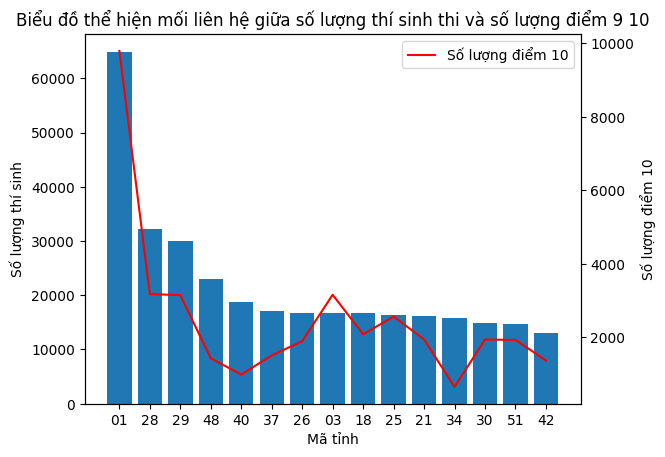

In [21]:
top15_num = df_check_valid.sort_values('Num',ascending =False).head(15)
fig,ax = plt.subplots()
ax.bar(top15_num.index,top15_num['Num'])

ax2=ax.twinx()
ax2.plot(top15_num.index,top15_num['NumOf9'],color="red",label = 'Số lượng điểm 10')

ax.set_xlabel('Mã tỉnh')
ax.set_ylabel('Số lượng thí sinh')
ax2.set_ylabel('Số lượng điểm 10')
plt.title('Biểu đồ thể hiện mối liên hệ giữa số lượng thí sinh thi và số lượng điểm 9 10')
plt.legend()
plt.show()

**NHẬN XÉT:**
- Ta thấy rằng Hà Nội là nơi có nhiều thí sinh nhất và cũng nhiều điểm 10 nhất. Khá dễ hiểu khi số lượng thi của Hà Nội cao hơn rất nhiều so với các địa phương khác trong tập dữ liệu, cũng như nơi đây cũng tập hợp những học sinh hàng đầu cả nước. Ở những địa phương có số lượng thí sinh xấp xỉ nhau, số lượng điểm 9 10 lại không hề có sự tương đồng với nhau. Tỉnh có mã là 40 (Đắk Lắk) và 48 (Đồng Nai) có lượng thí sinh thi đông nhưng lại không nhiều điểm 9 10, thậm chí thua khá nhiều với các tỉnh có số lượng thí sinh tương tự. Tỉnh có mã 03 (Hải Phòng) tuy số lượng thí sinh thi chỉ ở top 9 nhưng số lượng điểm 9, 10 lại chỉ thua mỗi Hà Nội.
- Ta có thể nói trừ khi số lượng thí sinh tham dự nhiều hơn rất nhiều thì có vẻ nó cũng không ảnh hưởng lắm đến số lượng 9 10 của tỉnh đó. Yếu tố quyết định ở đây có lẽ là số lượng thí sinh thuộc loại giỏi của mỗi tỉnh.

Ta sẽ coi top 15 tỉnh có điểm trung bình cao nhất có tỷ lệ điểm trên 9 như thế nào. Ta sẽ dùng barplot để biểu thị điểm trung bình  và lineplot là đường biểu diễn tỷ lệ điểm trên 9

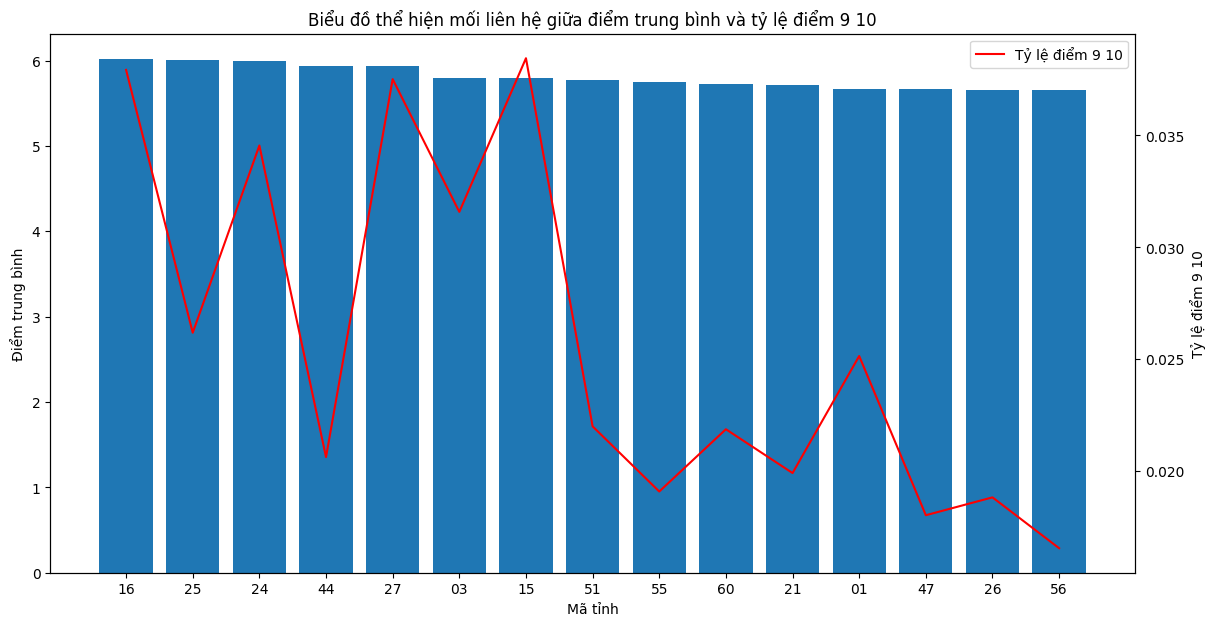

In [22]:
top15_avescore = df_check_valid.sort_values('Mean',ascending =False).head(15)

fig,ax = plt.subplots(figsize = (14,7))
ax.bar(top15_avescore.index,top15_avescore['Mean'])

ax2=ax.twinx()
ax2.plot(top15_avescore.index,(top15_avescore['NumOf9']/(top15_avescore['Num']*6)),color="red",label = 'Tỷ lệ điểm 9 10')

ax.set_xlabel('Mã tỉnh')
ax.set_ylabel('Điểm trung bình')
ax2.set_ylabel('Tỷ lệ điểm 9 10')
plt.title('Biểu đồ thể hiện mối liên hệ giữa điểm trung bình và tỷ lệ điểm 9 10')
plt.legend()
plt.show()

**NHẬN XÉT:** Ta thấy dường như không có mối liên hệ giữa điểm trung bình là tỷ lệ điểm 10

# LỢI ÍCH TRẢ LỜI CÂU HỎI:
TÌM RA ĐIỂM BẤT THƯỜNG ĐỂ ĐIỀU TRA XEM CÓ SAI PHẠM Ở TỈNH ĐÓ HAY KHÔNG